In [1]:
import os
import sys
import pickle
from tqdm import tqdm

import matplotlib.pyplot as plt

import numpy as np
import torch

import py3Dmol

In [2]:
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

In [3]:
import TopoDiff

# sampler
from TopoDiff.experiment.sampler import Sampler

# data
from TopoDiff.data.structure import StructureBuilder

# pdb
from myopenfold.np import protein

2024-10-02 16:04:49.691 - WARNING - attn_core_inplace_cuda not found. Skipping load of attention_core


attn_core_inplace_cuda not found, will use normal attention implementation


In [4]:
project_dir = os.path.dirname(os.path.dirname(TopoDiff.__path__[0]))
data_dir = os.path.join(project_dir, 'data', 'dataset')

# Sampling - unconditional & rejection sampling

In [5]:
sampler = Sampler(
    model_version='v1_1_2',
)

2024-10-02 16:04:50.160 - WARNING - output_dir is not provided, will return latent and structure result in memory
2024-10-02 16:04:50.161 - INFO - Using single-GPU


In [6]:
samle_config = {
    'sample_goal_list': [(80, 1), (100, 1), (120, 1), (140, 1), (160, 1)],
    'latent_seed': 123,
    'structure_seed': 123,
}

In [7]:
latent_result, structure_result = sampler.run(sample_config_override=samle_config)

2024-10-02 16:04:54.137 - INFO - final sampling configuration: {'sample_goal_list': [(80, 1), (100, 1), (120, 1), (140, 1), (160, 1)], 'latent_seed': 123, 'structure_seed': 123, 'label': 'default sampling', 'mode_preset': None, 'pred_sc': False, 'min_sc': [0.0, 0.0, 0.0, 0.0, 0.0], 'max_sc': [inf, inf, inf, inf, inf], 'pred_novelty': False, 'min_novelty': [0.0, 0.0, 0.0, 0.0, 0.0], 'max_novelty': [inf, inf, inf, inf, inf], 'pred_alpha': False, 'min_alpha': [0.0, 0.0, 0.0, 0.0, 0.0], 'max_alpha': [inf, inf, inf, inf, inf], 'pred_beta': False, 'min_beta': [0.0, 0.0, 0.0, 0.0, 0.0], 'max_beta': [inf, inf, inf, inf, inf], 'pred_coil': False, 'min_coil': [0.0, 0.0, 0.0, 0.0, 0.0], 'max_coil': [inf, inf, inf, inf, inf], 'length_epsilon': 0.2, 'length_k': 1, 'soft_prob': 0.1, 'latent_batch_size': 250}
2024-10-02 16:04:54.139 - INFO - Start sampling latent...
Sampling latent for length 160, repeat 0: 100%|██████████| 5/5 [00:00<00:00, 381.68it/s]
2024-10-02 16:04:54.871 - INFO - Successfully a

In [8]:
n_sample = len(structure_result)

size = 200
n_col = 5
n_row = int(np.ceil(n_sample / n_col))

view = py3Dmol.view(width=size * n_col, height=size * n_row, viewergrid=(n_row, n_col), linked=False)

for i in range(n_sample):
    row_idx = i // n_col
    col_idx = i % n_col

    view.addModelsAsFrames(structure_result[i], 'pdb', viewer=(row_idx, col_idx))
    style= {}
    style['cartoon'] = {'colorscheme':{'prop':'resi','gradient':'roygb','min': 0,'max': int(latent_result['length'][i].item())}}  # 
    view.setStyle({'model': 0}, style, viewer=(row_idx, col_idx))

view.zoomTo()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [9]:
samle_config = {
    'sample_goal_list': [(80, 1), (100, 1), (120, 1), (140, 1), (160, 1)],
    'latent_seed': 123,
    'structure_seed': 123,

    'pred_novelty': True,
    'max_novelty': [0.59, 0.58, 0.57, 0.56, 0.55],

    'pred_sc': True,
    'max_sc': 0.5,

    'soft_prob': 0,
}

In [10]:
latent_result, structure_result = sampler.run(sample_config_override=samle_config)

2024-10-02 16:05:22.821 - INFO - final sampling configuration: {'sample_goal_list': [(80, 1), (100, 1), (120, 1), (140, 1), (160, 1)], 'latent_seed': 123, 'structure_seed': 123, 'pred_novelty': True, 'max_novelty': [0.59, 0.58, 0.57, 0.56, 0.55], 'pred_sc': True, 'max_sc': [0.5, 0.5, 0.5, 0.5, 0.5], 'soft_prob': 0, 'label': 'default sampling', 'mode_preset': None, 'min_sc': [0.0, 0.0, 0.0, 0.0, 0.0], 'min_novelty': [0.0, 0.0, 0.0, 0.0, 0.0], 'pred_alpha': False, 'min_alpha': [0.0, 0.0, 0.0, 0.0, 0.0], 'max_alpha': [inf, inf, inf, inf, inf], 'pred_beta': False, 'min_beta': [0.0, 0.0, 0.0, 0.0, 0.0], 'max_beta': [inf, inf, inf, inf, inf], 'pred_coil': False, 'min_coil': [0.0, 0.0, 0.0, 0.0, 0.0], 'max_coil': [inf, inf, inf, inf, inf], 'length_epsilon': 0.2, 'length_k': 1, 'latent_batch_size': 250}
2024-10-02 16:05:22.822 - INFO - Start sampling latent...
Sampling latent for length 160, repeat 0: 100%|██████████| 5/5 [00:00<00:00,  5.52it/s]
2024-10-02 16:05:24.316 - INFO - Successfully a

In [11]:
n_sample = len(structure_result)

size = 200
n_col = 5
n_row = int(np.ceil(n_sample / n_col).astype(int))

view = py3Dmol.view(width=size * n_col, height=size * n_row, viewergrid=(n_row, n_col), linked=False)

for i in range(n_sample):
    row_idx = i // n_col
    col_idx = i % n_col

    view.addModelsAsFrames(structure_result[i], 'pdb', viewer=(row_idx, col_idx))
    style= {}
    style['cartoon'] = {'colorscheme':{'prop':'resi','gradient':'roygb','min': 0,'max': int(latent_result['length'][i].item())}} 
    view.setStyle({'model': 0}, style, viewer=(row_idx, col_idx))

view.zoomTo()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

# Sampling - interpolation

The latent space is associated with model v1_1_2. Please use this model version for the experiment.

In [12]:
def set_seed(sd):
    torch.manual_seed(sd)
    np.random.seed(sd)

In [13]:
device = sampler.model_diffusion.device
model = sampler.model_diffusion

sb = StructureBuilder()

In [14]:
embedding_path = os.path.join(data_dir, 'CATH_60_embedding.pkl')
with open(embedding_path, 'rb') as f:
    embedding = pickle.load(f)
    embed_2d = embedding['embed_2d']

In [15]:
latent_1 = embedding['latent_mu'][8707]
latent_2 = embedding['latent_mu'][6034]

n_interpolation = 10
latent_interpolation = torch.from_numpy(np.linspace(latent_1, latent_2, n_interpolation)).float().to(device)

In [16]:
latent_transformed = embed_2d.transform(latent_interpolation,
                                        perplexity = 50,
                                        n_iter = 500)

2024-10-02 16:05:52.093 - INFO - Automatically determined negative gradient method `bh`
2024-10-02 16:05:52.128 - INFO - Automatically determined negative gradient method `bh`


===> Finding 150 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.05 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 500 iterations...


Iteration   50, KL divergence 43.0428, 50 iterations in 1.8337 sec
Iteration  100, KL divergence 43.0414, 50 iterations in 1.7683 sec
Iteration  150, KL divergence 43.0414, 50 iterations in 1.7022 sec
Iteration  200, KL divergence 43.0414, 50 iterations in 1.9965 sec
Iteration  250, KL divergence 43.0414, 50 iterations in 1.5654 sec
Iteration  300, KL divergence 43.0414, 50 iterations in 2.1593 sec
Iteration  350, KL divergence 43.0414, 50 iterations in 1.7504 sec
Iteration  400, KL divergence 43.0414, 50 iterations in 1.7815 sec
Iteration  450, KL divergence 43.0414, 50 iterations in 1.5816 sec
Iteration  500, KL divergence 43.0414, 50 iterations in 1.8956 sec
   --> Time elapsed: 18.04 seconds


Text(0.5, 1.0, 't-SNE plot - interpolation')

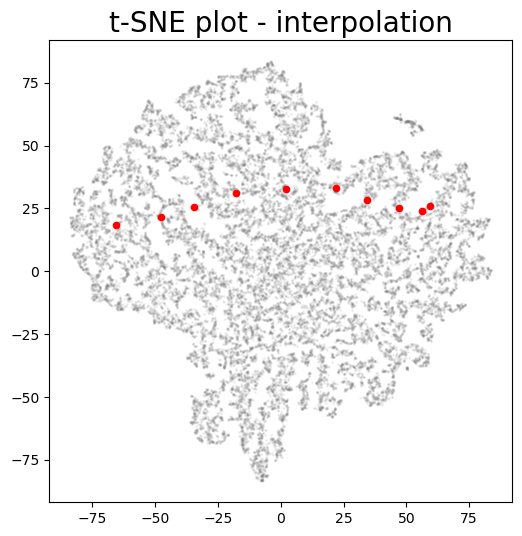

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), squeeze=False, subplot_kw={'aspect': 1})

scatter = ax[0, 0].scatter(embed_2d[:, 0], embed_2d[:, 1], s=1, color='grey', alpha=0.1)
scatter = ax[0, 0].scatter(latent_transformed[:, 0], latent_transformed[:, 1], s=20, color='red')
ax[0, 0].set_title('t-SNE plot - interpolation', fontsize=20)

In [18]:
n_res = 120
sd = 2

protein_list = []
model.diffuser.so3_diffuser.config.reverse_parm.score_and_noise.noise_scale = 0.
model.diffuser.so3_diffuser.config.reverse_parm.score_and_noise.score_scale = 1

for idx in tqdm(range(len(latent_interpolation))):
    set_seed(sd)
    feat, frame_noised = model._prepare_feat(
        latent = latent_interpolation[idx],
        num_res = n_res,
        timestep = 200,
        )

    prediction = model.sample_latent_conditional_from_feat(
    feat = feat,
    frame_noised = frame_noised,
    return_traj = True,
    return_frame = False,
    return_position = True,
    reconstruct_position = True,
    num_res = n_res,
    timestep = 200,
    translation_reverse_strategy_override = 'DDIM',
    rotation_reverse_strategy_override = 'score_and_noise',
    )

    coord37_record, coord37_mask = sb.coord14_to_coord37(prediction['coord_hat'], trunc=True)
    prot_traj = sb.get_coord_traj(coord37_record[None],
                                        aa_mask=coord37_mask,
                                        default_res='G'
                                        )
    protein_list.append(protein.to_pdb(prot_traj[0]))

100%|██████████| 10/10 [00:56<00:00,  5.68s/it]


In [19]:
size = 100
n_row = 1
n_col = 10
width = n_col * size
height = n_row * size
view = py3Dmol.view(width=n_col * size, height=n_row * size, viewergrid=(n_row, n_col), linked=False)

for i, protein_string in enumerate(protein_list):

    view.addModelsAsFrames(protein_string, 'pdb', viewer=(0, i))
    style= {}
    style['cartoon'] = {'colorscheme':{'prop':'resi','gradient':'roygb','min': 0,'max': n_res }}
    view.setStyle({'model': 0}, style, viewer=(0, i))

view.zoomTo()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.